# Setting up methods

We need methods to parse fasta files, return k-mer profiles, and find repeated sequences

In [11]:
from pandas import DataFrame
import matplotlib.pyplot as plt

In [12]:
def parse_fasta_file(input_file, prot_family=''):
    """Return a dict of {id:gene_seq} pairs based on the sequences in the input FASTA file
    input_file -- a file handle for an input fasta file
    prot_family -- string representing the protein family that we want to focus on.
        When this parameter is given, only sequences of this family are added to the dictionary
        When it is not given, the whole file is added to the dictionary
    """
    parsed_seqs = {}
    curr_seq_id = None
    curr_seq = []
    
    prev_prot_in_family = False
    
    # parse every line in the file
    for line in input_file:
        
        # get rid of \n and \t characters
        line = line.strip()
        
        # identifier line
        if line.startswith(">"):
                
            if (curr_seq_id is not None) and prev_prot_in_family:
                # add the sequence to the dictionary
                parsed_seqs[curr_seq_id] = ''.join(curr_seq)
            
            # check if the id contains the protein family we want
            if prot_family in line:
                prev_prot_in_family = True
            else:
                prev_prot_in_family = False
                
            curr_seq_id = line[1:]
            curr_seq = []
            continue

        curr_seq.append(line)

    #Add the final sequence to the dict
    parsed_seqs[curr_seq_id] = ''.join(curr_seq)
    return parsed_seqs

In [13]:
def kmer_counts(seqs, k=3):
    """Returns kmer count dictionary within an inputted dictionary of sequences
    seqs -- sequence dictionary
    k -- k-length of sequences to look for
    """
    results = {}
    for seq_id, seq in seqs.items():
        for i in range(len(seq) - (k - 1)):
            short = seq[i: i+k]
            results[short] = results.get(short, 0) + 1
    return results

In [14]:
def find_repeated_seqs(seq_dict, num_appearances=1, k=3):
    """Returns a dictionary whose keys are the repeated sequences found in the inputted sequences, and that repeat more
    than the specified num_appearances parameter. Values are the number of times that the sequences repeat
    seq_dict -- dictionary of sequences. Keys are sequence ids, and values are the actual sequence strings
    num_appearances -- minimum number of times a sequence must repeat to be put into the returned dictionary
    k -- k-length of the sequence motifs we want
    """
    unfiltered = kmer_counts(allergen_dict, k)
    filtered = {}
    for seq, count in unfiltered.items():
        if count > num_appearances:
            filtered[seq] = count
    return filtered

In [15]:
# parse the COMPARE Data
filename = 'COMPARE2025-FastA-Seq-01-27-2025.txt'
file = open(filename, 'r')
allergen_dict = parse_fasta_file(file, 'lipocalin')
file.close()

In [16]:
# parse the human data
filename = 'human_lipocalin_protein_sequences.fasta'
file = open(filename, 'r')
human_dict = parse_fasta_file(file)
file.close()

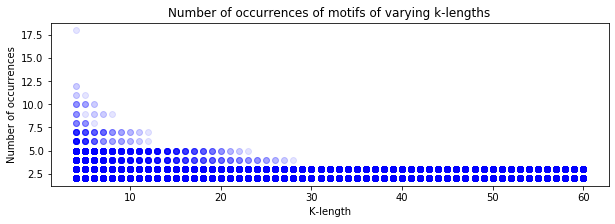

In [17]:
min_k_length = 4
max_k_length = 60
step = 1
plt.figure(figsize=(10, 3))
all_results = [] # list of dictionaries of repeated sequences and how many times they appear

# test all k-lengths from the min to the max and store repeated sequences in all_results
for i in range(min_k_length, max_k_length + 1, step):
    results = find_repeated_seqs(allergen_dict, k=i)
    all_results.append(results)
    plt.plot([i]*len(results), list(results.values()), 'bo', alpha=0.1)
    
plt.xlabel('K-length')
plt.ylabel('Number of occurrences')
plt.title('Number of occurrences of motifs of varying k-lengths')
plt.show()

In [18]:
def calc_total_length(seqs):
    """
    dictionary of protein sequences is passed in, returns the total length of all the combined sequences
    seqs -- dictionary of protein sequences
    """
    total_length = 0
    for seq in seqs.values():
        total_length += len(seq)
        
    return total_length

In [19]:
from random import choice, shuffle

def calc_p_value(seq, num_occurrences, long_seq, num_trials=100):
    """ returns p value of a sequence occurring a certain number of times in a bigger sequence
    seq -- sequence that repeats that you want to find the probability of occurring 
    num_occurrences -- number of times sequence appears that you want to find probability of
    long_seq -- a sequence that is the same size as your original data, will be shuffled for monte carlo test
    num_trials -- number of trials you want to run the monte carlo simulation for 
    """
    count = 0
    for i in range(num_trials):
        print('\t' + str(i))
        shuffle(long_seq)
        if ''.join(long_seq).count(seq) >= num_occurrences:
              count += 1
    return count / num_trials

In [20]:
def get_big_sequence(sequences):
    """ returns combined sequence from a dictionary of sequences with each character as an element in a list
    sequences -- dictionary of sequences
    """
    big_sequence = []
    for seq_id, seq in sequences.items():
        seq_list = list(seq)
        big_sequence += seq_list
    return big_sequence

big_sequence = get_big_sequence(allergen_dict)

In [21]:
# do first monte carlo test where sequence is randomly generated
total_length = 6115
aas = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']
long_seq = []
for i in range(total_length):
    long_seq.append(choice(aas))
    
index_of_interest = 4
seqs_of_interest = all_results[index_of_interest]

    

In [22]:
# identify sequences of length 8 that occur over 5 times
priority_seqs = {}
for seq, count in seqs_of_interest.items():
    if count > 5:
        priority_seqs[seq] = count
priority_seqs

{'LLLLCLGL': 9,
 'LLLCLGLT': 6,
 'LLCLGLTL': 6,
 'LCLGLTLV': 6,
 'CLGLTLVC': 6,
 'EKIEENGS': 7,
 'KIEENGSM': 7,
 'IEENGSMR': 7,
 'EENGSMRV': 7,
 'ENGSMRVF': 7}

In [27]:
# calculate p values for first monte carlo test
p_values = []
for seq, count in priority_seqs.items():
    p_values.append(calc_p_value(seq, count, long_seq, num_trials=100))
print(p_values)

	0
	1
	2
	3
	4
	5
	6
	7
	8
	9
	10
	11
	12
	13
	14
	15
	16
	17
	18
	19
	20
	21
	22
	23
	24
	25
	26
	27
	28
	29
	30
	31
	32
	33
	34
	35
	36
	37
	38
	39
	40
	41
	42
	43
	44
	45
	46
	47
	48
	49
	50
	51
	52
	53
	54
	55
	56
	57
	58
	59
	60
	61
	62
	63
	64
	65
	66
	67
	68
	69
	70
	71
	72
	73
	74
	75
	76
	77
	78
	79
	80
	81
	82
	83
	84
	85
	86
	87
	88
	89
	90
	91
	92
	93
	94
	95
	96
	97
	98
	99
	0
	1
	2
	3
	4
	5
	6
	7
	8
	9
	10
	11
	12
	13
	14
	15
	16
	17
	18
	19
	20
	21
	22
	23
	24
	25
	26
	27
	28
	29
	30
	31
	32
	33
	34
	35
	36
	37
	38
	39
	40
	41
	42
	43
	44
	45
	46
	47
	48
	49
	50
	51
	52
	53
	54
	55
	56
	57
	58
	59
	60
	61
	62
	63
	64
	65
	66
	67
	68
	69
	70
	71
	72
	73
	74
	75
	76
	77
	78
	79
	80
	81
	82
	83
	84
	85
	86
	87
	88
	89
	90
	91
	92
	93
	94
	95
	96
	97
	98
	99
	0
	1
	2
	3
	4
	5
	6
	7
	8
	9
	10
	11
	12
	13
	14
	15
	16
	17
	18
	19
	20
	21
	22
	23
	24
	25
	26
	27
	28
	29
	30
	31
	32
	33
	34
	35
	36
	37
	38
	39
	40
	41
	42
	43
	44
	45
	46
	47
	48
	49
	50
	51
	52
	53
	54
	55
	56
	5

In [25]:
import pandas as pd

# calculate p-values for second monte carlo test
p_values_2 = []
for seq, count in priority_seqs.items():
    p_values_2.append(calc_p_value(seq, count, big_sequence, num_trials=100))
    
p_values_2

	0
	1
	2
	3
	4
	5
	6
	7
	8
	9
	10
	11
	12
	13
	14
	15
	16
	17
	18
	19
	20
	21
	22
	23
	24
	25
	26
	27
	28
	29
	30
	31
	32
	33
	34
	35
	36
	37
	38
	39
	40
	41
	42
	43
	44
	45
	46
	47
	48
	49
	50
	51
	52
	53
	54
	55
	56
	57
	58
	59
	60
	61
	62
	63
	64
	65
	66
	67
	68
	69
	70
	71
	72
	73
	74
	75
	76
	77
	78
	79
	80
	81
	82
	83
	84
	85
	86
	87
	88
	89
	90
	91
	92
	93
	94
	95
	96
	97
	98
	99
	0
	1
	2
	3
	4
	5
	6
	7
	8
	9
	10
	11
	12
	13
	14
	15
	16
	17
	18
	19
	20
	21
	22
	23
	24
	25
	26
	27
	28
	29
	30
	31
	32
	33
	34
	35
	36
	37
	38
	39
	40
	41
	42
	43
	44
	45
	46
	47
	48
	49
	50
	51
	52
	53
	54
	55
	56
	57
	58
	59
	60
	61
	62
	63
	64
	65
	66
	67
	68
	69
	70
	71
	72
	73
	74
	75
	76
	77
	78
	79
	80
	81
	82
	83
	84
	85
	86
	87
	88
	89
	90
	91
	92
	93
	94
	95
	96
	97
	98
	99
	0
	1
	2
	3
	4
	5
	6
	7
	8
	9
	10
	11
	12
	13
	14
	15
	16
	17
	18
	19
	20
	21
	22
	23
	24
	25
	26
	27
	28
	29
	30
	31
	32
	33
	34
	35
	36
	37
	38
	39
	40
	41
	42
	43
	44
	45
	46
	47
	48
	49
	50
	51
	52
	53
	54
	55
	56
	5

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [28]:

# create data table of sequence counts and p values
data_table = pd.DataFrame([priority_seqs.values(), p_values, p_values_2], index=['count', 'p-value random', 'p_value shuffle'], columns=priority_seqs.keys())
data_table

,LLLLCLGL,LLLCLGLT,LLCLGLTL,LCLGLTLV,CLGLTLVC,EKIEENGS,KIEENGSM,IEENGSMR,EENGSMRV,ENGSMRVF
count,9.0,6.0,6.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0
p-value random,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
p_value shuffle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
